# Data Loading

In [1]:
import DataLoader
import importlib

In [102]:
importlib.reload(DataLoader)
my_loader = DataLoader.DataLoader()

In [3]:
the_data = my_loader.load_data('./Data/allignmentChartData.xlsx')
aidan_data = my_loader.load_data('./Data/AidanData.xlsx')

dataframe            Hoe/Bitch  Tits/Boob  Stripper/Prostitute  4th Of July/Christmas  \
Aidan      -0.766265  -0.013514            -1.000000              -0.352459   
Anish       0.437659  -0.099099            -0.378613              -0.642077   
Brian       0.903308  -0.695946             0.594164              -0.240437   
Cass       -0.137349  -0.509009             0.474801               0.500000   
Dina        0.386768   0.941573            -0.780347               0.687117   
Jack       -1.106024  -0.880631             1.037135               0.355828   
KDawg      -0.424096  -1.000000             0.371353              -0.502732   
Madi        0.641221   0.051685            -0.014451               0.641104   
Moll Ball   0.819338   0.701124             0.883289              -0.513661   
Nick       -0.542169   0.550562             0.687003               0.840491   
Sam         0.473282  -1.263514            -0.202312              -0.106557   
Shawty     -0.544578   0.914607           

In [103]:
euclidean_distances = my_loader.calculate_distances(the_data, 2, 2)
manhattan_distances = my_loader.calculate_distances(the_data, 1, 2)
cosine_distance = my_loader.calculate_cosine_distance(the_data)

In [5]:
magnitudes = my_loader.calculate_magnitudes(the_data, 2, 2)
print(magnitudes)

{'Aidan': Decimal('2.83'), 'Anish': Decimal('2.41'), 'Brian': Decimal('3.02'), 'Cass': Decimal('2.76'), 'Dina': Decimal('2.45'), 'Jack': Decimal('3.31'), 'KDawg': Decimal('2.48'), 'Madi': Decimal('2.88'), 'Moll Ball': Decimal('2.78'), 'Nick': Decimal('3.19'), 'Sam': Decimal('3.52'), 'Shawty': Decimal('2.80'), 'Tea': Decimal('2.30'), 'Vedant': Decimal('2.68')}


In [6]:
column_pairs = my_loader.produce_word_pairs(the_data)
print(column_pairs)

{'Hoe/Bitch': ('Hoe', 'Bitch'), 'Tits/Boob': ('Tits', 'Boob'), 'Stripper/Prostitute': ('Stripper', 'Prostitute'), '4th Of July/Christmas': ('4th Of July', 'Christmas'), 'Andriod/Iphone': ('Andriod', 'Iphone'), 'Big Spoon/Little Spoon': ('Big Spoon', 'Little Spoon'), 'Oppenheimer/Barbie': ('Oppenheimer', 'Barbie'), 'Bear/Twink': ('Bear', 'Twink'), 'Times New Roman/Arial': ('Times New Roman', 'Arial'), 'Bold/Italic': ('Bold', 'Italic'), 'Pigeon/Mourning Dove': ('Pigeon', 'Mourning Dove'), 'Crow/Raven': ('Crow', 'Raven'), 'Hyper Pop/Folk': ('Hyper Pop', 'Folk'), 'Jazz/Post Rock': ('Jazz', 'Post Rock'), 'Will/Phil': ('Will', 'Phil'), 'BCNR/ModestMouse': ('BCNR', 'ModestMouse'), 'Mo Bamba/Obama': ('Mo Bamba', 'Obama'), 'Lego Batman/Real Batman': ('Lego Batman', 'Real Batman'), 'Pasta/Rice': ('Pasta', 'Rice'), 'Chicken Parmesan/Shrimp Scampi': ('Chicken Parmesan', 'Shrimp Scampi'), 'Biter/Non-Biter': ('Biter', 'Non-Biter'), 'Swimmer/Non-Swimmer': ('Swimmer', 'Non-Swimmer'), 'Holds Hands/Hold

# the way this will work
the plan will be every word (e.g. Barbie) will produce two functions that explain how they map to both words in the pairing. Then for each person plug in their value to both function and sum them together.

# Predictor

In [26]:
import Predictor
import OpenAPIFunction
import copy

In [115]:
importlib.reload(OpenAPIFunction)
importlib.reload(Predictor)
my_predictor = Predictor.Predictor()
demo = False

In [9]:
# test_func = my_predictor.generate_function('something', 'anotherThing', demo=demo)
# test_func.calculate(1)

In [18]:
encodings = my_predictor.generate_encodings(x_axis=('MainCharacter/NPC', ('Main Character', 'NPC')), y_axis=('Good/Evil', ('Good', 'Evil')), word_pairs=column_pairs, demo=demo)
print(encodings)

{'Hoe': TextDoc(id='b8dd00d515f45427e00788c3ba47cfbe', text='Hoe', url=None, embedding=NdArrayEmbedding([ 0.01409192, -0.01323909, -0.00165066, ..., -0.01007823,
                   0.02156429,  0.00400016]), bytes_=None), 'Bitch': TextDoc(id='8fa096e38b48573ec0a226afa2200a0f', text='Bitch', url=None, embedding=NdArrayEmbedding([-0.03045207, -0.01015069,  0.01105791, ..., -0.01280256,
                  -0.00532594, -0.01339891]), bytes_=None), 'Tits': TextDoc(id='0d89cd9d65483db17373ffb2b8ee94bc', text='Tits', url=None, embedding=NdArrayEmbedding([-0.02187876, -0.0147232 , -0.01373666, ..., -0.01564731,
                  -0.00597545, -0.02019289]), bytes_=None), 'Boob': TextDoc(id='c4b27aa1ac2f0eb0509f14cab21902b9', text='Boob', url=None, embedding=NdArrayEmbedding([-0.03658451, -0.02002534, -0.00581911, ..., -0.01839346,
                  -0.01154967, -0.02259334]), bytes_=None), 'Stripper': TextDoc(id='f129f225d9abd394b30d0cecb54a771d', text='Stripper', url=None, embedding=NdArrayEmbe

In [81]:
from scipy.spatial.distance import cosine, euclidean
good_encoding = encodings['Good']
evil_encoding = encodings['Evil']
print(cosine(good_encoding.embedding, evil_encoding.embedding))
print(euclidean(good_encoding.embedding, evil_encoding.embedding))

good_encoding = encodings['Main Character']
evil_encoding = encodings['NPC']
print(cosine(good_encoding.embedding, evil_encoding.embedding))
print(euclidean(good_encoding.embedding, evil_encoding.embedding))

0.1710016239987766
0.5848104487996846
0.18508379727349
0.6084140061996322


In [112]:
functions = my_predictor.generate_functions(column_pairs, ('Main Character', 'NPC'), encodings, demo=demo)
gaused_functions = copy.deepcopy(functions)
my_predictor.transform_to_gausian_functions(gaused_functions, conversion_ratio=1)
print(functions)

pos axis 

TextDoc(
    id='958f4c61ffbcd9242711cd209bbfc84c',
    text='Main Character',
    url=None,
    embedding=NdArrayEmbedding([ 0.00086203, -0.00373657,  0.00161631, ..., -0.01521154,
                  -0.02068875, -0.00797711]),
    bytes_=None
)
neg axis 

TextDoc(
    id='81e2dfbba34e518d473edc170865a3b1',
    text='NPC',
    url=None,
    embedding=NdArrayEmbedding([ 0.00159714, -0.02997316,  0.01194129, ..., -0.03514796,
                  -0.01330767, -0.01313324]),
    bytes_=None
)
triggered negation Non-Biter Biter
triggered negation Non-Biter Biter
triggered negation Non-Swimmer Swimmer
triggered negation Non-Swimmer Swimmer
{'Hoe/Bitch': ((<OpenAPIFunction.OpenAPIFunction object at 0x0000021ED28DC050>, <OpenAPIFunction.OpenAPIFunction object at 0x0000021ECE7E90D0>), (<OpenAPIFunction.OpenAPIFunction object at 0x0000021ED2A89ED0>, <OpenAPIFunction.OpenAPIFunction object at 0x0000021ED09A14D0>)), 'Tits/Boob': ((<OpenAPIFunction.OpenAPIFunction object at 0x0000021ED09A3750>, <OpenAPIFunction.OpenAPIFunction object at 0x0000021ECDB4BBD0>), (<OpenAPIFunction.OpenAPIFunction object at 0x0000021ED2822890>, <OpenAPIFunction.OpenAPIFunction object at 0x0000021ED2821DD0>)), 'Stripper/Prostitute': ((<OpenAPIFunction.OpenAPIFunction object a

In [113]:
# predictions = my_predictor.make_predictions(the_data, functions)
gaused_predictions = my_predictor.make_predictions(the_data, gaused_functions)
# standardized_predictions = my_predictor.standardize(predictions)
gaused_stand_prediction = my_predictor.standardize(gaused_predictions, scale=0.85)
# print(predictions)
print(gaused_predictions)
# print(standardized_predictions)
print(gaused_stand_prediction)

Hoe/Bitch
from word Hoe to word Main Character distance 0.31350831867157014 val -0.7662650602409639
from word Hoe to word NPC distance 0.4033988194648937 val -0.7662650602409639
from word Bitch to word Main Character distance -0.21447543138900793 val 0.7662650602409639
from word Bitch to word NPC distance 0.24084588476972016 val 0.7662650602409639
total for section 0.2800168657498763 -0.36543081536540456
Tits/Boob
from word Tits to word Main Character distance 0.2599252214225246 val -0.013513513513513514
from word Tits to word NPC distance 0.3675200160767955 val -0.013513513513513514
from word Boob to word Main Character distance -0.03221087380589232 val 0.013513513513513514
from word Boob to word NPC distance 0.17201394826731464 val 0.013513513513513514
total for section 0.0013058111813369737 -0.09663002741893605
Stripper/Prostitute
from word Stripper to word Main Character distance -0.2550888859088112 val -1.0
from word Stripper to word NPC distance 0.0006792599544915588 val -1.0
fro

# Post Process

In [156]:
print(magnitudes)
prediction_shift = my_predictor.magnitude_shift(magnitudes, average_shift=-0.05, scaling_factor=0.5)
print(prediction_shift)

{'Aidan': Decimal('2.83'), 'Anish': Decimal('2.41'), 'Brian': Decimal('3.02'), 'Cass': Decimal('2.76'), 'Dina': Decimal('2.45'), 'Jack': Decimal('3.31'), 'KDawg': Decimal('2.48'), 'Madi': Decimal('2.88'), 'Moll Ball': Decimal('2.78'), 'Nick': Decimal('3.19'), 'Sam': Decimal('3.52'), 'Shawty': Decimal('2.80'), 'Tea': Decimal('2.30'), 'Vedant': Decimal('2.68')}
{'Aidan': Decimal('2.83'), 'Anish': Decimal('2.41'), 'Brian': Decimal('3.02'), 'Cass': Decimal('2.76'), 'Dina': Decimal('2.45'), 'Jack': Decimal('3.31'), 'KDawg': Decimal('2.48'), 'Madi': Decimal('2.88'), 'Moll Ball': Decimal('2.78'), 'Nick': Decimal('3.19'), 'Sam': Decimal('3.52'), 'Shawty': Decimal('2.80'), 'Tea': Decimal('2.30'), 'Vedant': Decimal('2.68')}
avg 2.815 std 0.3408550173565629899701901367
{'Aidan': -0.038998254949912575, 'Anish': -0.3470471163523579, 'Brian': 0.10035718235119366, 'Cass': -0.09033973185032035, 'Dina': -0.317709129552125, 'Jack': 0.3130575866528822, 'KDawg': -0.2957056394519505, 'Madi': -0.00232577144

In [157]:
summed = dict()
prediction = gaused_stand_prediction
for name in prediction_shift:
    summed[name] = prediction_shift[name] + prediction[name]
print(summed)

{'Aidan': -0.09695330069915054, 'Anish': -0.7301741363216389, 'Brian': -0.11640137010704855, 'Cass': -0.9000984962608753, 'Dina': -0.27334882340932215, 'Jack': 0.3118780873574161, 'KDawg': -0.5787376907541537, 'Madi': 0.03904545092254605, 'Moll Ball': -0.2055288197825921, 'Nick': 0.5811422304525342, 'Sam': 0.5290970735050669, 'Shawty': 1.050227694208418, 'Tea': 0.0007324925083491141, 'Vedant': -0.31088039161954906}


# Good Evil

In [89]:
GE_functions = my_predictor.generate_functions(column_pairs, ('Good', 'Evil'), encodings, demo=demo)
GE_gaused_functions = copy.deepcopy(functions)
my_predictor.transform_to_gausian_functions(gaused_functions, conversion_ratio=1)
print(functions)

pos axis 

TextDoc(
    id='03295eabe48d65ed32d7cb09aeb9ca1f',
    text='Good',
    url=None,
    embedding=NdArrayEmbedding([-0.00279003, -0.01814983,  0.01167981, ..., -0.01387546,
                  -0.00334869, -0.01495379]),
    bytes_=None
)
neg axis 

TextDoc(
    id='f60956846a7424342f285793a96937f4',
    text='Evil',
    url=None,
    embedding=NdArrayEmbedding([-0.0101416 , -0.00730989, -0.01751556, ..., -0.00166891,
                  -0.01018004, -0.03187908]),
    bytes_=None
)
triggered negation Non-Biter Biter
triggered negation Non-Biter Biter
triggered negation Non-Swimmer Swimmer
triggered negation Non-Swimmer Swimmer
{'Hoe/Bitch': ((<OpenAPIFunction.OpenAPIFunction object at 0x0000021ED2B3FDD0>, <OpenAPIFunction.OpenAPIFunction object at 0x0000021ED2B410D0>), (<OpenAPIFunction.OpenAPIFunction object at 0x0000021ED2B2FDD0>, <OpenAPIFunction.OpenAPIFunction object at 0x0000021ED2AA3DD0>)), 'Tits/Boob': ((<OpenAPIFunction.OpenAPIFunction object at 0x0000021ED2ACD890>, <OpenAPIFunction.OpenAPIFunction object at 0x0000021ED2ACEA10>), (<OpenAPIFunction.OpenAPIFunction object at 0x0000021ED27AA590>, <OpenAPIFunction.OpenAPIFunction object at 0x0000021ED27AA710>)), 'Stripper/Prostitute': ((<OpenAPIFunction.OpenAPIFunction object 

In [90]:
GE_predictions = my_predictor.make_predictions(the_data, GE_functions)
GE_standardized_predictions = my_predictor.standardize(GE_predictions)

print(GE_predictions)

print(GE_standardized_predictions)


Hoe/Bitch
from word Hoe to word Good distance 0.21330805973321187 val -0.7662650602409639
from word Hoe to word Evil distance 0.22631313601280878 val -0.7662650602409639
from word Bitch to word Good distance 0.19393046309386608 val 0.7662650602409639
from word Bitch to word Evil distance 0.18768791955996478 val 0.7662650602409639
total for section 0.014748778555885383 -0.01924761981349822
Tits/Boob
from word Tits to word Good distance 0.21078818103256713 val -0.013513513513513514
from word Tits to word Evil distance 0.20796418962062835 val -0.013513513513513514
from word Boob to word Good distance 0.19020456803278596 val 0.013513513513513514
from word Boob to word Evil distance 0.1996731569348621 val 0.013513513513513514
total for section -0.00016611595018939038 0.012292580314014888
Stripper/Prostitute
from word Stripper to word Good distance 0.21959969238711963 val -1.0
from word Stripper to word Evil distance 0.22423904928789096 val -1.0
from word Prostitute to word Good distance 0.2

In [91]:
GE_gaused_predictions = my_predictor.make_predictions(the_data, GE_gaused_functions)
GE_gaused_stand_prediction = my_predictor.standardize(GE_gaused_predictions, scale=0.85)
print(GE_gaused_predictions)
print(GE_gaused_stand_prediction)

Hoe/Bitch
from word Hoe to word Main Character distance 0.22770871532382075 val -0.7662650602409639
from word Hoe to word NPC distance 0.23209330866378308 val -0.7662650602409639
from word Bitch to word Main Character distance 0.20195522620435769 val 0.7662650602409639
from word Bitch to word NPC distance 0.22416445624260795 val 0.7662650602409639
total for section 0.013658396313386945 -0.017824636698287995
Tits/Boob
from word Tits to word Main Character distance 0.22509508997676775 val -0.013513513513513514
from word Tits to word NPC distance 0.23034324652158888 val -0.013513513513513514
from word Boob to word Main Character distance 0.21084555341621214 val 0.013513513513513514
from word Boob to word NPC distance 0.22080703751981035 val 0.013513513513513514
total for section 6.369361565914874e-05 -0.004713327558777007
Stripper/Prostitute
from word Stripper to word Main Character distance 0.19997422175306623 val -1.0
from word Stripper to word NPC distance 0.21244983707425757 val -1.0


# RESULTS

In [159]:
GOOD_EVIL = {'Aidan': -1.0019546608056418, 'Anish': 0.5134234538926529, 'Brian': 0.48359695260606506, 'Cass': -0.17514604390604765, 'Dina': -0.5288006759460153, 'Jack': -0.20613108166537222, 'KDawg': 0.3258904553223815, 'Madi': 0.1610594098847092, 'Moll Ball': 0.04313567348985606, 'Nick': -0.24403959908064643, 'Sam': 0.9515629592529953, 'Shawty': -0.322327895103304, 'Tea': -0.47071538068475793, 'Vedant': 0.47044643274312525}
MC_NPC ={'Aidan': -0.12029826769973277, 'Anish': -0.753519103322221, 'Brian': -0.1397463371076308, 'Cass': -0.9234434632614577, 'Dina': -0.2966937904099044, 'Jack': 0.28853312035683387, 'KDawg': -0.6020826577547359, 'Madi': 0.0157004839219638, 'Moll Ball': -0.22887378678317435, 'Nick': 0.5577972634519519, 'Sam': 0.5057521065044847, 'Shawty': 1.0268827272078358, 'Tea': -0.022612474492233137, 'Vedant': -0.33422535862013125}
MC_NPC = summed

x_axis_title = 'NPC/MainCharacter'
x_axis_data = MC_NPC
y_axis_title = 'Evil/Good'
y_axis_data = GOOD_EVIL


# Data Visualization

## alignment chart

In [13]:
import DataVisualization

In [151]:
importlib.reload(DataVisualization)
my_visualizer = DataVisualization.DataVisualization()

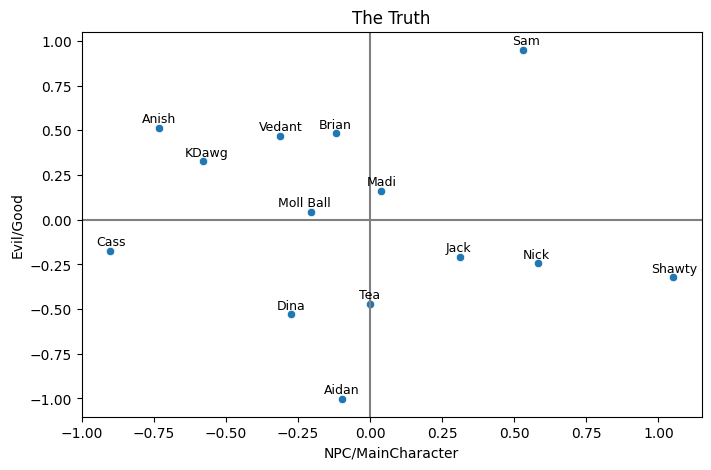

In [161]:
my_visualizer.create_allignment_chart(x_axis_data, y_axis_data, x_axis_title, y_axis_title, title="The Truth")

lower dict {'Aidan': Decimal('3.40'), 'Anish': Decimal('2.73'), 'Brian': Decimal('3.57'), 'Cass': Decimal('3.09'), 'Dina': Decimal('3.27'), 'Jack': Decimal('3.57'), 'KDawg': Decimal('3.09'), 'Madi': Decimal('3.27'), 'Moll Ball': Decimal('3.01'), 'Nick': Decimal('3.35'), 'Sam': Decimal('3.81'), 'Shawty': Decimal('3.08'), 'Tea': Decimal('3.08'), 'Vedant': Decimal('2.73')}
upper dict {'Aidan': 0.84, 'Anish': 0.57, 'Brian': 0.63, 'Cass': 0.69, 'Dina': 0.74, 'Jack': 0.63, 'KDawg': 0.69, 'Madi': 0.73, 'Moll Ball': 0.67, 'Nick': 0.62, 'Sam': 0.67, 'Shawty': 0.62, 'Tea': 0.71, 'Vedant': 0.57}
middle min 2.30
middle min 3.52
image [[ 0.   -0.5   1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
   1.    1.  ]
 [-0.5   0.    1.    1.    1.    1.    1.    1.   -0.5   1.    1.    1.
   1.   -0.5 ]
 [-1.   -1.    0.    1.    1.   -0.5   1.    1.    1.    1.   -0.5   1.
   1.    1.  ]
 [-1.   -1.   -1.    0.    1.    1.   -0.5   1.    1.    1.    1.    1.
   1.    1.  ]
 [-1.   -1.   -1.   -1

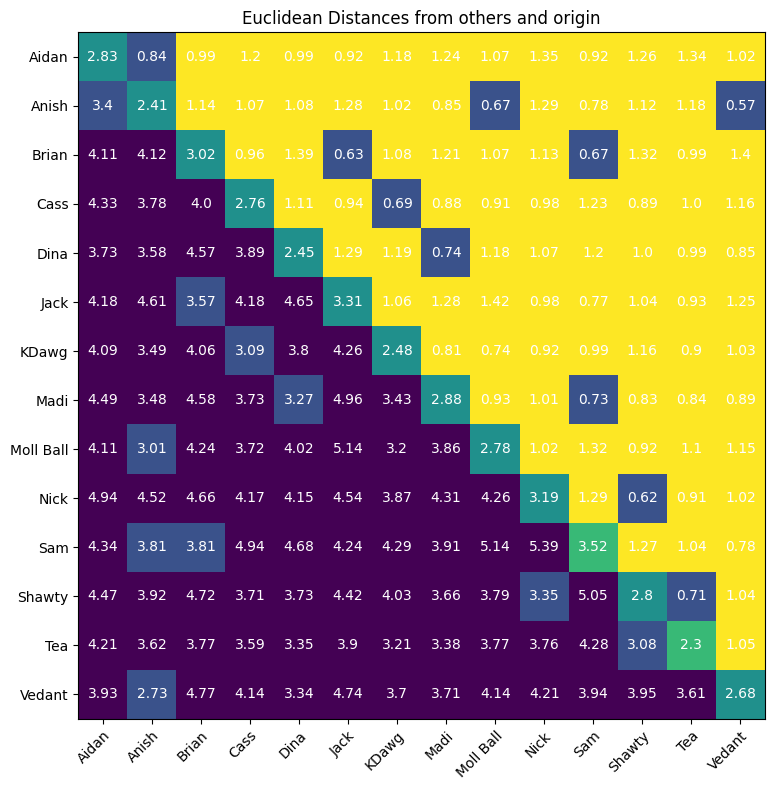

In [104]:
my_visualizer.create_distance_matrix(euclidean_distances, magnitudes , cosine_distance)